# 1. In the code provided there are three mistake which stops the code from running successfully.

In [ ]:
from keras.models import Sequential
from keras import layers
from keras.preprocessing.text import Tokenizer
import pandas as pd
import numpy as np
from sklearn import preprocessing
from keras.preprocessing.sequence import pad_sequences
from sklearn.model_selection import train_test_split
from keras.layers import Embedding, Flatten

In [ ]:
df = pd.read_csv("/content/imdb_master.csv", encoding="latin-1")
#df = pd.read_csv('imdb_master.csv', encoding='latin-1')
print(df.head())

# Remove the unsup classifier data from the dataset
data = df.loc[(df['label'] != 'unsup')]
print(data.shape)

sentences = data['review'].values
y = data['label'].values
print(np.unique(y))

   id  type  ... label         file
0   0  test  ...   neg      0_2.txt
1   1  test  ...   neg  10000_4.txt
2   2  test  ...   neg  10001_1.txt
3   3  test  ...   neg  10002_3.txt
4   4  test  ...   neg  10003_3.txt

[5 rows x 5 columns]
(50000, 5)
['neg' 'pos']


# tokenizing data

In [ ]:
tokenizer = Tokenizer(num_words=2000)
tokenizer.fit_on_texts(sentences)

# getting the vocabulary of data

In [ ]:
sentences = tokenizer.texts_to_matrix(sentences)

In [ ]:
le = preprocessing.LabelEncoder()
y = le.fit_transform(y)
X_train, X_test, y_train, y_test = train_test_split(sentences, y, test_size=0.25, random_state=1000)

**I have made 3 corrections here-**
1. I **changed the input_dim to 2000** as after using the tokenizer function with number of words to 2000. the dimesion of the dataset has changed to 2000.
2. I **changed the number of neurons for the last layer from 5 to 2** as we have two classes for the output i.e., 'pos' and 'neg'
3. I **changed the activation function for the last layer to 'softMax'** because this function is more suitable for classification problems.

In [ ]:
model = Sequential()
model.add(layers.Dense(300, input_dim=2000, activation='relu'))
model.add(layers.Dense(2, activation='softmax'))
model.compile(loss='sparse_categorical_crossentropy', optimizer='adam', metrics=['accuracy'])

In [ ]:
history = model.fit(X_train,y_train, epochs=5, verbose=True, validation_data = (X_test,y_test), batch_size=256)

Epoch 1/5
147/147 [==============================] - 7s 7ms/step - loss: 0.4109 - accuracy: 0.8087 - val_loss: 0.2968 - val_accuracy: 0.8763
Epoch 2/5
147/147 [==============================] - 1s 4ms/step - loss: 0.2548 - accuracy: 0.8984 - val_loss: 0.2919 - val_accuracy: 0.8775
Epoch 3/5
147/147 [==============================] - 1s 4ms/step - loss: 0.2081 - accuracy: 0.9181 - val_loss: 0.2909 - val_accuracy: 0.8774
Epoch 4/5
147/147 [==============================] - 1s 4ms/step - loss: 0.1362 - accuracy: 0.9567 - val_loss: 0.3168 - val_accuracy: 0.8752
Epoch 5/5
147/147 [==============================] - 1s 4ms/step - loss: 0.0702 - accuracy: 0.9853 - val_loss: 0.3323 - val_accuracy: 0.8739


In [ ]:
model.summary()

Model: "sequential_3"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_6 (Dense)              (None, 300)               600300    
_________________________________________________________________
dense_7 (Dense)              (None, 2)                 602       
Total params: 600,902
Trainable params: 600,902
Non-trainable params: 0
_________________________________________________________________


## Model accuracy

In [ ]:
[test_loss, test_acc] = model.evaluate(X_test,y_test)
print("Model Evaluation result on Test Data : Loss = {}, accuracy = {}".format(test_loss, test_acc))

391/391 [==============================] - 1s 2ms/step - loss: 0.3323 - accuracy: 0.8739
Model Evaluation result on Test Data : Loss = 0.3322637379169464, accuracy = 0.8739200234413147


# 2. Add embedding layer to the model, check improvement, if any .

## Preparing data for embedding layer

In [ ]:
df = pd.read_csv("/content/imdb_master.csv", encoding="latin-1")
#df = pd.read_csv('imdb_master.csv', encoding='latin-1')

# Remove the unsup classifier data from the dataset
data = df.loc[(df['label'] != 'unsup')]

sentences = data['review'].values
y = data['label'].values
print(np.unique(y))

#tokenizing data
tokenizer = Tokenizer(num_words=2000)
tokenizer.fit_on_texts(sentences)

#getting the vocabulary of data
max_review_len= max([len(s.split()) for s in sentences])
vocab_size= len(tokenizer.word_index)+1
sentences = tokenizer.texts_to_sequences(sentences)
padded_docs= pad_sequences(sentences,maxlen=max_review_len)

['neg' 'pos']


In [ ]:
le = preprocessing.LabelEncoder()
y = le.fit_transform(y)
X_train, X_test, y_train, y_test = train_test_split(padded_docs, y, test_size=0.25, random_state=1000)

## Adding embedding layer in keras

In [ ]:
emb_model = Sequential()

# Add embedding layer to the existing model
emb_model.add(Embedding(vocab_size, 50, input_length=max_review_len))
emb_model.add(Flatten())

emb_model.add(layers.Dense(256,input_dim=2000, activation='relu'))
emb_model.add(layers.Dense(2, activation='softmax'))

emb_model.compile(loss='sparse_categorical_crossentropy',optimizer='adam',metrics=['accuracy'])

In [ ]:
history = emb_model.fit(X_train,y_train, epochs=5, verbose=True, validation_data = (X_test,y_test), batch_size=256)

Epoch 1/5
147/147 [==============================] - 21s 137ms/step - loss: 1.2539 - accuracy: 0.5039 - val_loss: 0.6920 - val_accuracy: 0.5275
Epoch 2/5
147/147 [==============================] - 20s 134ms/step - loss: 0.6696 - accuracy: 0.5851 - val_loss: 0.4797 - val_accuracy: 0.8507
Epoch 3/5
147/147 [==============================] - 20s 133ms/step - loss: 0.4450 - accuracy: 0.8710 - val_loss: 0.4033 - val_accuracy: 0.8753
Epoch 4/5
147/147 [==============================] - 19s 132ms/step - loss: 0.3668 - accuracy: 0.8967 - val_loss: 0.3696 - val_accuracy: 0.8794
Epoch 5/5
147/147 [==============================] - 19s 130ms/step - loss: 0.3157 - accuracy: 0.9110 - val_loss: 0.3492 - val_accuracy: 0.8791


In [ ]:
emb_model.summary()

Model: "sequential_4"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
embedding (Embedding)        (None, 2470, 50)          6184100   
_________________________________________________________________
flatten (Flatten)            (None, 123500)            0         
_________________________________________________________________
dense_8 (Dense)              (None, 256)               31616256  
_________________________________________________________________
dense_9 (Dense)              (None, 2)                 514       
Total params: 37,800,870
Trainable params: 37,800,870
Non-trainable params: 0
_________________________________________________________________


## Model Accuracy of model with embedding layers

In [ ]:
[test_loss, test_acc] = emb_model.evaluate(X_test, y_test)
print("Embedded Model Evaluation result on Test Data : Loss = {}, accuracy = {}".format(test_loss, test_acc))

391/391 [==============================] - 2s 6ms/step - loss: 0.3492 - accuracy: 0.8791
Embedded Model Evaluation result on Test Data : Loss = 0.349162220954895, accuracy = 0.8791199922561646


**Observation**: We see that **the model accuracy has slightly increased with embedding layers.**

# 4. Plot the loss and accuracy using history object.

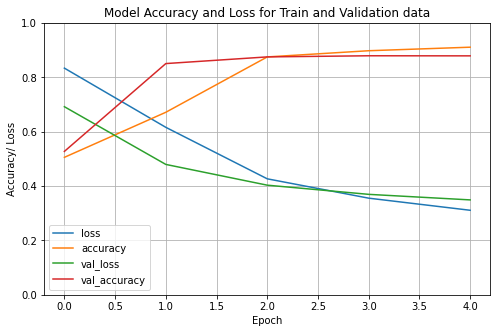

In [ ]:
import matplotlib.pyplot as plt
pd.DataFrame(history.history).plot(figsize=(8, 5))
plt.grid(True)
plt.title('Model Accuracy and Loss for Train and Validation data')
plt.ylabel('Accuracy/ Loss')
plt.xlabel('Epoch')
plt.gca().set_ylim(0, 1) 
plt.show()

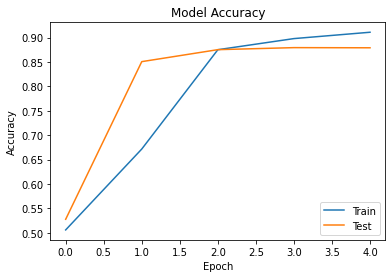

In [ ]:
import matplotlib.pyplot as plt

plt.plot(history.history['accuracy'])
plt.plot(history.history['val_accuracy'])
plt.title('Model Accuracy')
plt.ylabel('Accuracy')
plt.xlabel('Epoch')
plt.legend(['Train', 'Test'], loc='lower right')
plt.show()

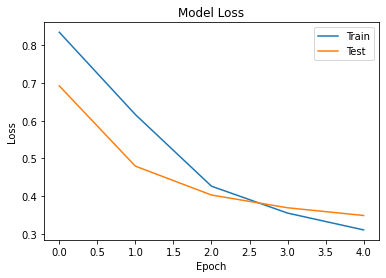

In [ ]:
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.title('Model Loss')
plt.ylabel('Loss')
plt.xlabel('Epoch')
plt.legend(['Train', 'Test'], loc='upper right')
plt.show()

# 5. Predict over one sample of data and check what will be the prediction for that.

In [ ]:
predicted = emb_model.predict(X_test[24].reshape(1, 2470))
print("Actual value=" + str(y_test[24]) + "    Predicted value=" + str(predicted.argmax()))

Actual value=0    Predicted value=0


# Bonus Point: Plot loss and accuracy in Tensorboard.

In [ ]:
from keras.callbacks import TensorBoard
from time import time

df = pd.read_csv("/content/imdb_master.csv", encoding="latin-1")
#df = pd.read_csv('imdb_master.csv', encoding='latin-1')

# Remove the unsup classifier data from the dataset
data = df.loc[(df['label'] != 'unsup')]

sentences = data['review'].values
y = data['label'].values
print(np.unique(y))

#tokenizing data
tokenizer = Tokenizer(num_words=2000)
tokenizer.fit_on_texts(sentences)

#getting the vocabulary of data
sentences = tokenizer.texts_to_matrix(sentences)

le = preprocessing.LabelEncoder()
y = le.fit_transform(y)
X_train, X_test, y_train, y_test = train_test_split(sentences, y, test_size=0.25, random_state=1000)

['neg' 'pos']


In [ ]:
tb_model = Sequential()
tb_model.add(Embedding(2000, 50, input_length=2000))
tb_model.add(Flatten())
tb_model.add(layers.Dense(300,input_dim=2000, activation='relu'))
tb_model.add(layers.Dense(3,activation='softmax'))

tensorborad = TensorBoard(log_dir="logs/{}".format(time()))

tb_model.compile(loss='sparse_categorical_crossentropy', optimizer='adam', metrics=['acc'])

tb_model.fit(X_train, y_train, batch_size=256, epochs=2, verbose=1, validation_data=(X_test, y_test), callbacks=[tensorborad])

history=tb_model.fit(X_train,y_train, epochs=3, verbose=True, validation_data=(X_test,y_test), batch_size=256)

Epoch 1/2
147/147 [==============================] - 11s 74ms/step - loss: 0.9332 - acc: 0.6913 - val_loss: 0.3064 - val_acc: 0.8727
Epoch 2/2
147/147 [==============================] - 10s 69ms/step - loss: 0.2813 - acc: 0.8848 - val_loss: 0.2952 - val_acc: 0.8769
Epoch 1/3
147/147 [==============================] - 10s 68ms/step - loss: 0.2705 - acc: 0.8879 - val_loss: 0.2864 - val_acc: 0.8775
Epoch 2/3
147/147 [==============================] - 10s 68ms/step - loss: 0.2551 - acc: 0.8946 - val_loss: 0.2903 - val_acc: 0.8766
Epoch 3/3
147/147 [==============================] - 10s 68ms/step - loss: 0.2410 - acc: 0.8996 - val_loss: 0.2893 - val_acc: 0.8772


In [ ]:
[test_loss, test_acc] = tb_model.evaluate(X_test, y_test)
print("Embedded Model Evaluation result on Test Data : Loss = {}, accuracy = {}".format(test_loss, test_acc))

391/391 [==============================] - 2s 5ms/step - loss: 0.2893 - acc: 0.8772
Embedded Model Evaluation result on Test Data : Loss = 0.28925731778144836, accuracy = 0.8772000074386597


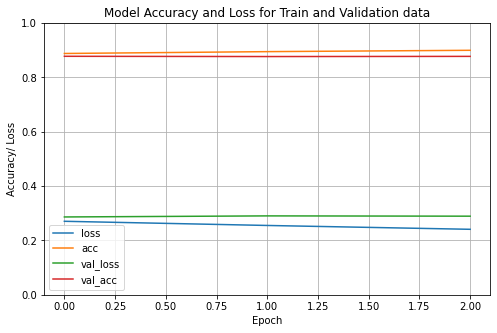

In [ ]:
import matplotlib.pyplot as plt

pd.DataFrame(history.history).plot(figsize=(8, 5))
plt.grid(True)
plt.title('Model Accuracy and Loss for Train and Validation data')
plt.ylabel('Accuracy/ Loss')
plt.xlabel('Epoch')
plt.gca().set_ylim(0, 1) 
plt.show()